In [1]:
from fastai.vision.all import *


In [2]:
path =  Path("/root/.fastai/data/oxford-iiit-pet/images")
# delete directory if it exists
if os.path.exists(path):
    shutil.rmtree(path)

path = untar_data(URLs.PETS)
print(path)



/root/.fastai/data/oxford-iiit-pet


In [3]:

additional_images = Path('./images')
print(additional_images.ls())

# Gather all image files recursively
all_images = get_image_files(additional_images)

# Verify images
failed = verify_images(all_images)
print(f"Failed images: {failed}")

# Unlink (delete) failed images
for img in failed:
    img.unlink()

[Path('images/Affenpinscher'), Path('images/Afghan Hound'), Path('images/Africanis'), Path('images/Airedale Terrier'), Path('images/Akbash'), Path('images/Akita'), Path('images/Aksaray Malaklisi'), Path('images/Alano Español'), Path('images/Alapaha Blue Blood Bulldog'), Path('images/Alaskan Husky'), Path('images/Alaskan Klee Kai'), Path('images/Alaskan Malamute'), Path('images/Alpine Dachsbracke'), Path('images/American Bulldog'), Path('images/American Bully'), Path('images/American Cocker Spaniel'), Path('images/American English Coonhound'), Path('images/American Foxhound'), Path('images/American Hairless Terrier'), Path('images/American Pit Bull Terrier'), Path('images/American Staffordshire Terrier'), Path('images/American Water Spaniel'), Path('images/Anglo-Français de Petite Vénerie'), Path('images/Appenzeller Sennenhund'), Path('images/Ariège Pointer'), Path('images/Ariégeois'), Path('images/Armenian Gampr'), Path('images/Artois Hound'), Path('images/Australian Cattle Dog'), Path

In [4]:
ims = get_image_files(additional_images)
ims = [img for img in ims if img.parent.name[0].lower() == 'a']

# print(ims[:20])
for i, img in enumerate(ims):
    category = img.parent.name
    try:
        im = PILImage.create(img)
    except:
        print(f"Failed to open {img}")
        continue

    shutil.copy(src=img, dst=path/'images'/f"{category}_{i}.jpg")

failed = verify_images(path/'images')
print(f"Failed images: {failed}")
failed.map(Path.unlink)


/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


'PosixPath' object is not iterable
Failed images: []


(#0) []

In [5]:
import torch; print(torch.cuda.get_device_name(0))

NVIDIA GeForce RTX 4070 Ti


In [33]:
from PIL import Image
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
import re

path =  Path("/root/.fastai/data/oxford-iiit-pet/images")
print(path.ls())

all_images = get_image_files(path)

# Extract labels from file names
def get_label(file_path):
    file_name = file_path.name if isinstance(file_path, Path) else file_path
    match = re.match(r'(.+)_\d+\.jpg', file_name)
    if match:
        return match.group(1)
    else:
        raise ValueError(f"Filename {file_name} does not match the expected pattern")

# Create a list of labels
print(all_images[:5])
labels = [get_label(img) for img in all_images]

# Define a custom transformation to convert images to RGB
def convert_to_rgb(x):
    if isinstance(x, Image.Image):  # If it's a PIL Image
        return x.convert('RGB')
    return x

# Stratified split
train_idx, valid_idx = train_test_split(range(len(all_images)), test_size=0.2, stratify=labels, random_state=42)

# Create DataLoaders with stratified split
dls = ImageDataLoaders.from_name_func(
    path, 
    all_images, 
    label_func=get_label, 
    item_tfms=[convert_to_rgb, RandomResizedCrop(224, min_scale=0.5)],
    batch_tfms=aug_transforms(size=224, min_scale=0.75),
    splitter=IndexSplitter(valid_idx),
    bs=128
)



[Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_73.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_7.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Akita_1353.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_80.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Ariège Pointer_2777.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_176.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_34.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_63.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_160.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_110.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_17.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Afghan Hound_313.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_67.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Alano Español_1542.jpg'), Path('/root/.fastai/data/oxford-iiit-

In [40]:
import timm

model_name = 'convnext_tiny'
# model_name = 'resnet50'
the_model = timm.create_model(model_name, pretrained=True, num_classes=dls.c)
learn = Learner(
    dls, 
    the_model,  # Pass the already initialized model
    metrics=accuracy
).to_bf16()


In [41]:

learn.lr_find(suggest_funcs=(slide, valley))


/opt/miniconda3/envs/work/lib/python3.11/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/opt/miniconda3/envs/work/lib/python3.11/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site

In [39]:
learn.fine_tune(10, 1e-4)
learn.path = Path('.')
learn.export()


epoch,train_loss,valid_loss,accuracy,time
0,3.009056,1.063697,0.694458,01:08


/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site

epoch,train_loss,valid_loss,accuracy,time
0,0.872368,0.718684,0.801990,02:36
1,0.662541,0.534246,0.841307,-1:59:20
2,0.489886,0.558891,0.823307,00:28
3,0.371826,0.582498,0.820938,00:26
4,0.282726,0.484071,0.866414,00:27
5,0.226663,0.477746,0.868783,00:29
6,0.186408,0.495502,0.871625,00:30
7,0.152255,0.468159,0.876836,00:30
8,0.129117,0.502420,0.876362,00:28
9,0.121641,0.494679,0.878257,01:54


/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site

/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


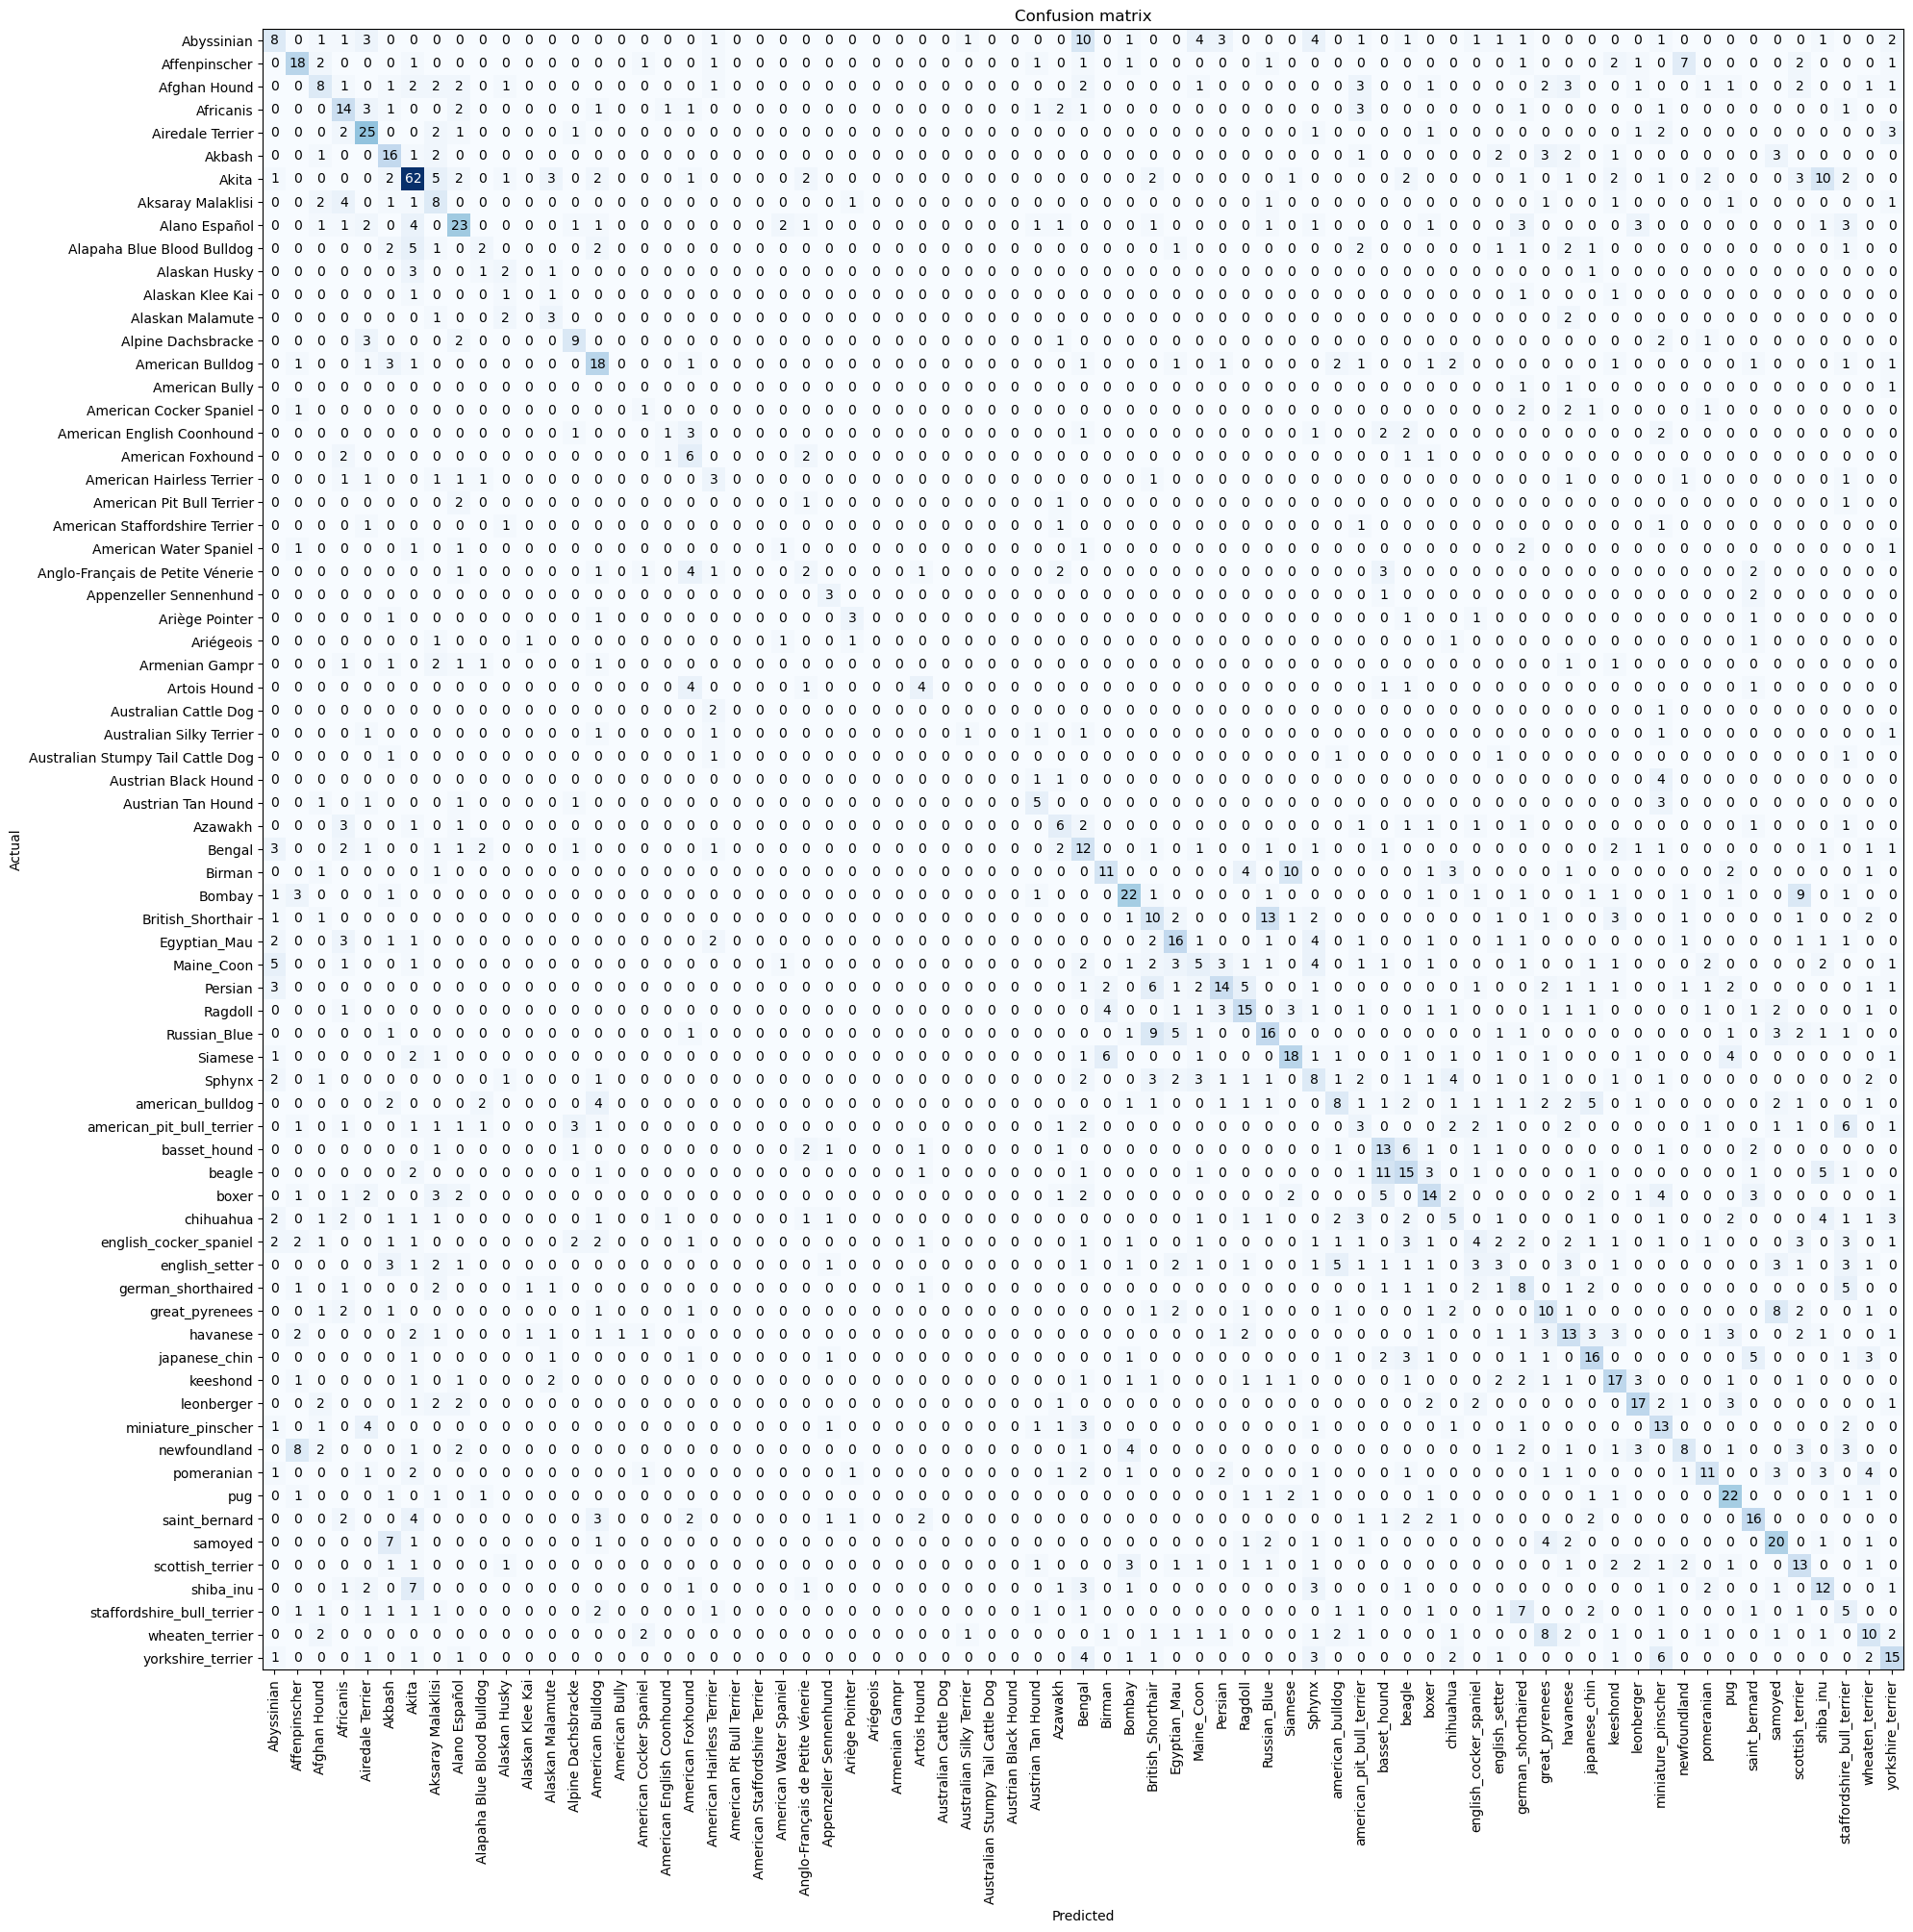

In [10]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(20, 20))


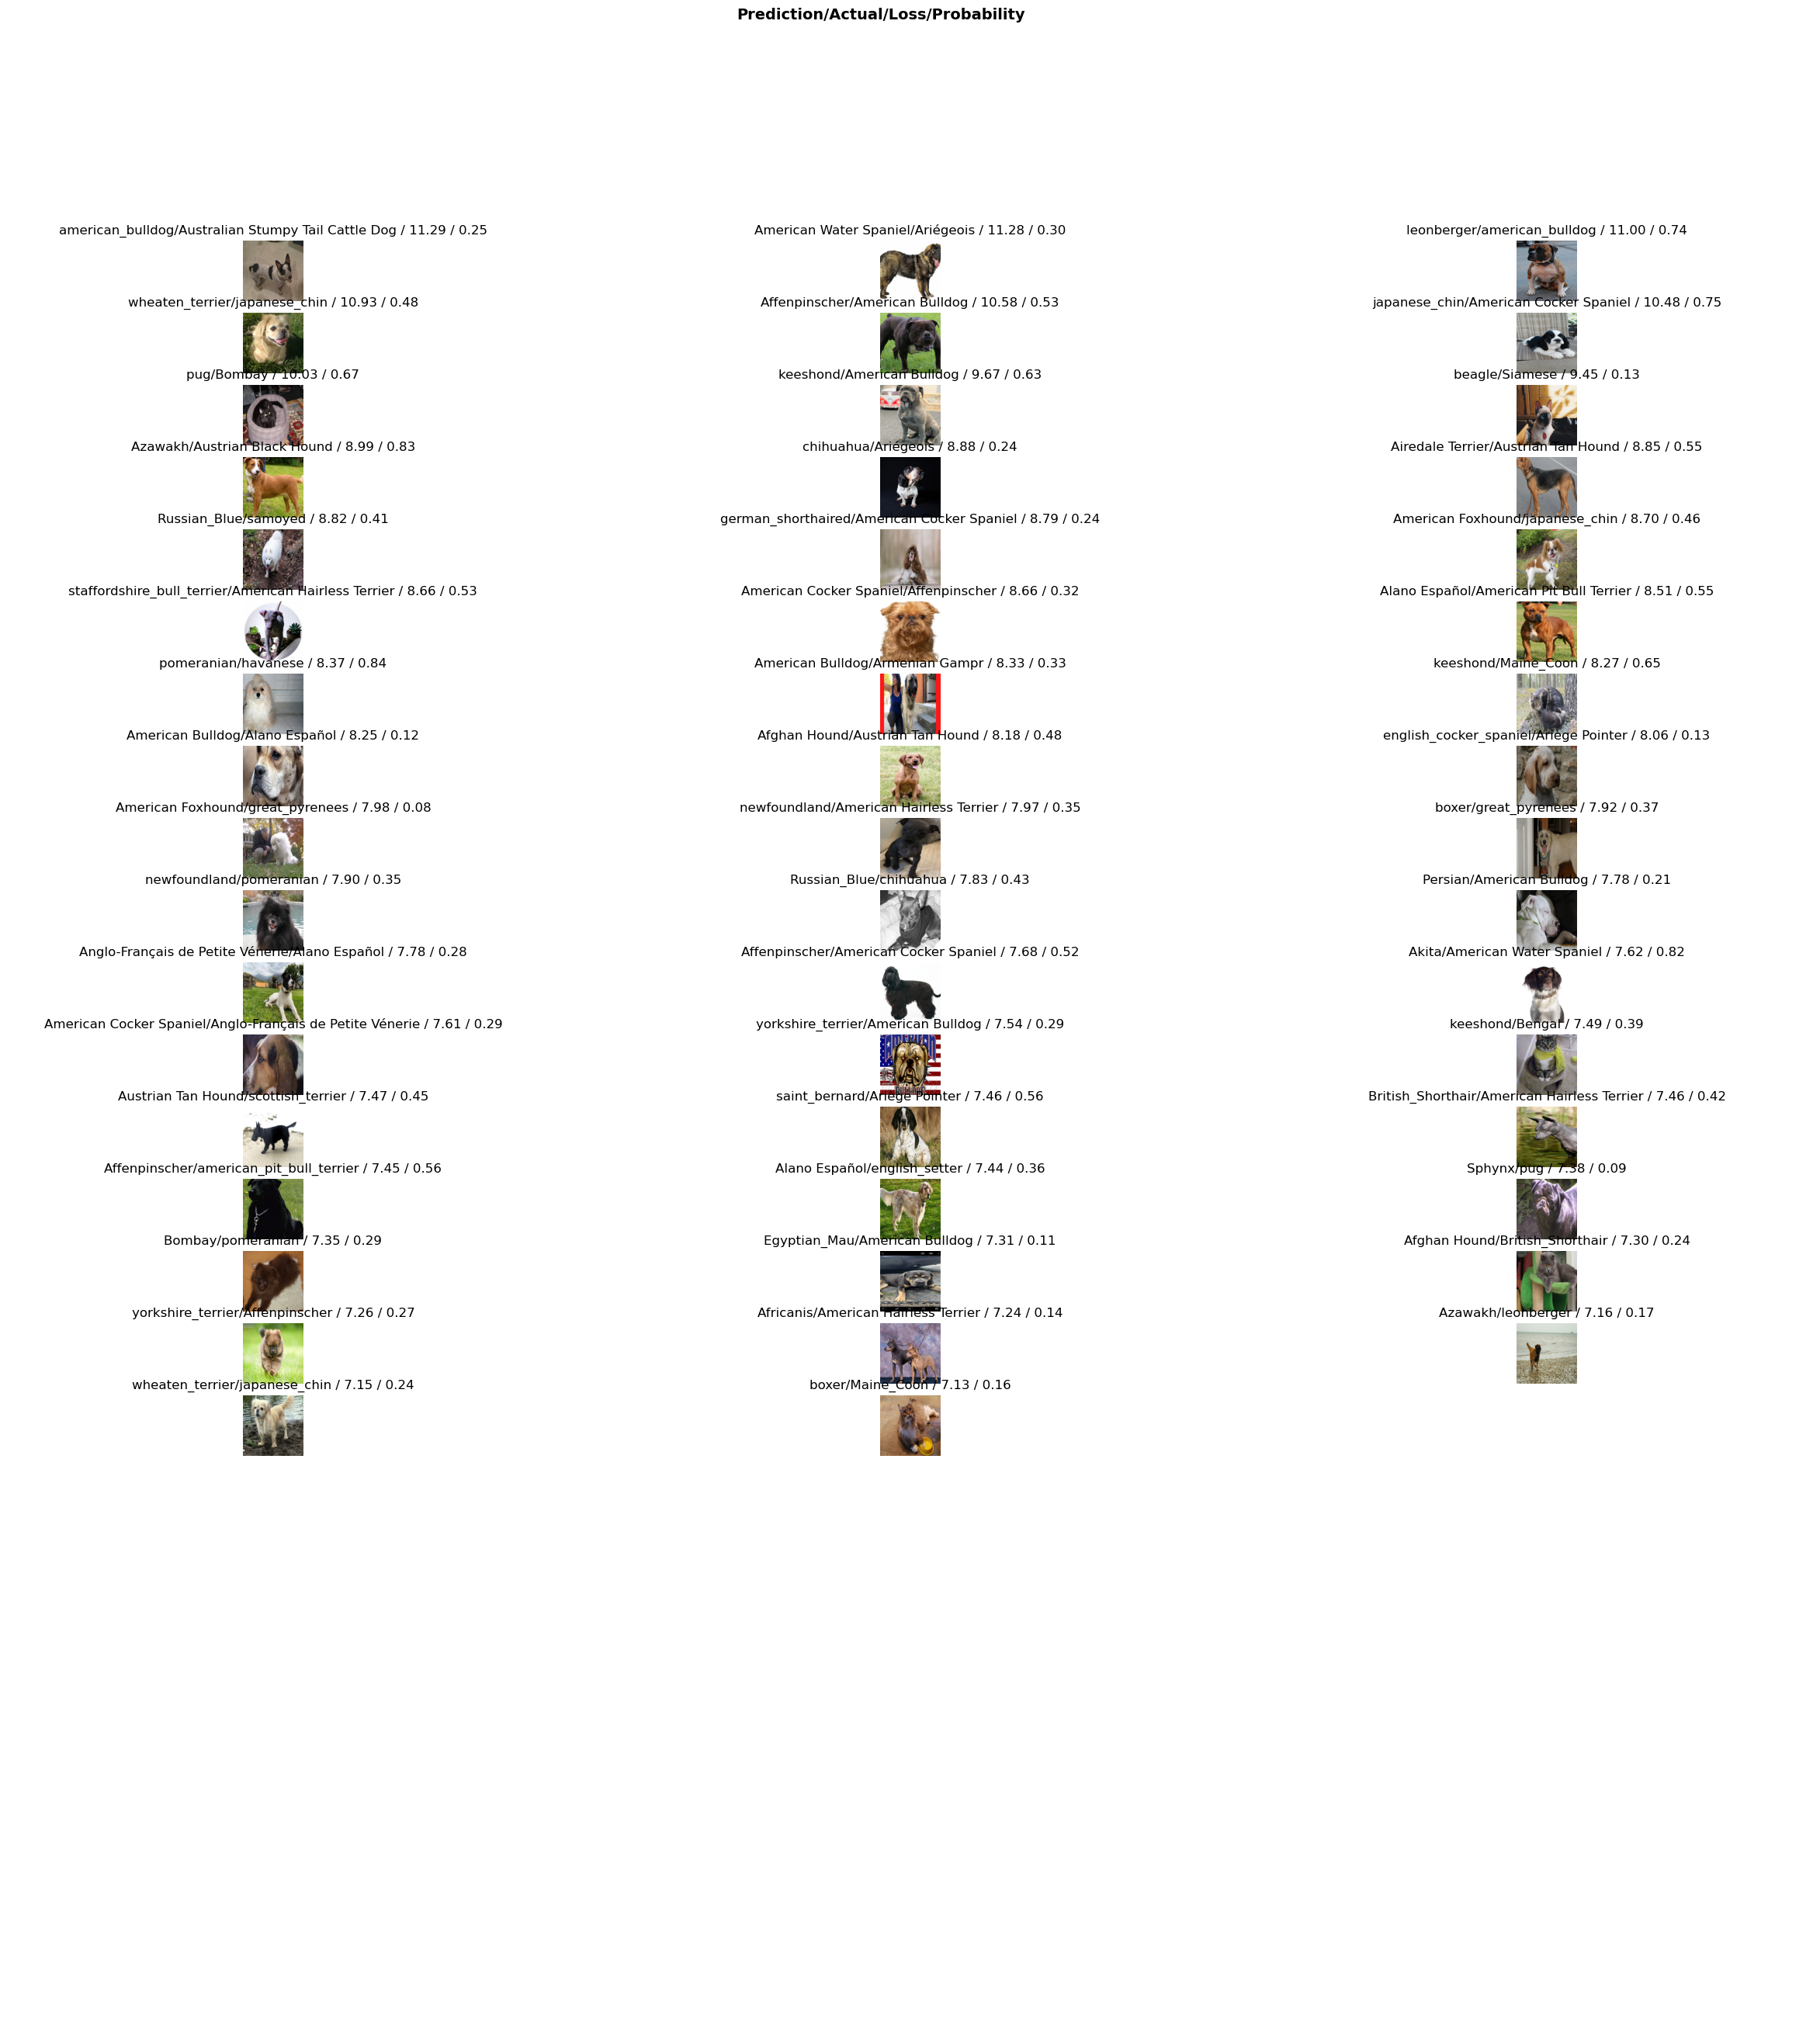

In [11]:

interp.plot_top_losses(50, nrows=25, ncols=3, figsize=(30, 30))